In [ ]:
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from visualkeras import layered_view
import json
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model

In [ ]:
#load data
ytrain = np.load('ytrain.npy')
ytest = np.load('ytest.npy')
xtrain = np.load('xtrain.npy')
xtest = np.load('xtest.npy')

In [ ]:
# Image size
image_size = (150, 150)

# Training batch size
batch_size = 32
image_shape = (image_size[0], image_size[1], 3)
epochs = 32
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

In [ ]:
model_woBN_dilated = Sequential([
    Conv2D(32, (3, 3), dilation_rate=(1, 1), input_shape=image_shape, name= 'regular conv'),  
    Activation('relu',name='relu1'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='Max1'),

    Conv2D(64, (3, 3), dilation_rate=(2, 2),name='dilated conv1'),  
    Activation('relu',name='relu2'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='Max2'),

    Conv2D(128, (3, 3), dilation_rate=(2, 2),name='dilated conv2'),  
    Activation('relu',name='relu3'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='max3'),
    
    Conv2D(128, (3, 3), dilation_rate=(2, 2),name='dilated conv3'),  
    Activation('relu',name='relu4'),
    MaxPooling2D(pool_size=(2, 2), strides=(1, 1),name='max4'),
    
    Conv2D(256, (3, 3), dilation_rate=(2, 2),name='dilated conv4'),  
    Activation('relu',name='relu5'),
    MaxPooling2D(pool_size=(2, 2), strides=(1, 1),name='max5'),
    
    Flatten(name='flatten'),
    Dense(256, activation='relu',name= 'dense1'),
    Dropout(0.3,name='drop1'), 
    Dense(256, activation='relu',name='dense2'),
    Dropout(0.3,name='drop2'),  
    Dense(128, activation='relu',name='dense3'),
    Dropout(0.3,name='drop3'), 

    Dense(4, activation='softmax', name='softmax')  
])

model_woBN_dilated.summary()

/Users/user/IUBH/Semester5/neuralnets/nnenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ regular conv (Conv2D)           │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (Activation)              │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max1 (MaxPooling2D)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dilated conv1 (Conv2D)          │ (None, 70, 70, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (Activation)              │ (None, 70, 70, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max2 (MaxPooling2D)             │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dilated conv2 (Conv2D)          │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (Activation)              │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max3 (MaxPooling2D)             │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dilated conv3 (Conv2D)          │ (None, 11, 11, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu4 (Activation)              │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max4 (MaxPooling2D)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dilated conv4 (Conv2D)          │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu5 (Activation)              │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max5 (MaxPooling2D)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,273,860 (8.67 MB)

 Trainable params: 2,273,860 (8.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile model with optimizer, loss function and metrics
model_woBN_dilated.compile(
    optimizer= Adam(),
    loss='categorical_crossentropy',       
    metrics=['accuracy', 'precision', 'recall', 'auc']
)

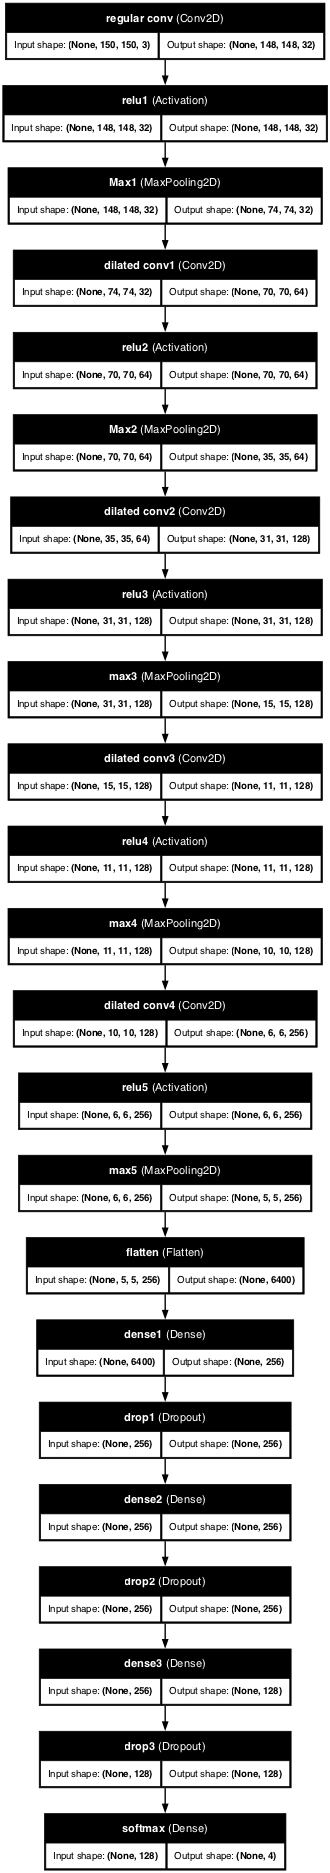

In [ ]:
plot_model(model_woBN_dilated, to_file="cnn_plot.png", show_shapes=True, show_layer_names=True, dpi= 50)


/Users/user/IUBH/Semester5/neuralnets/nnenv/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


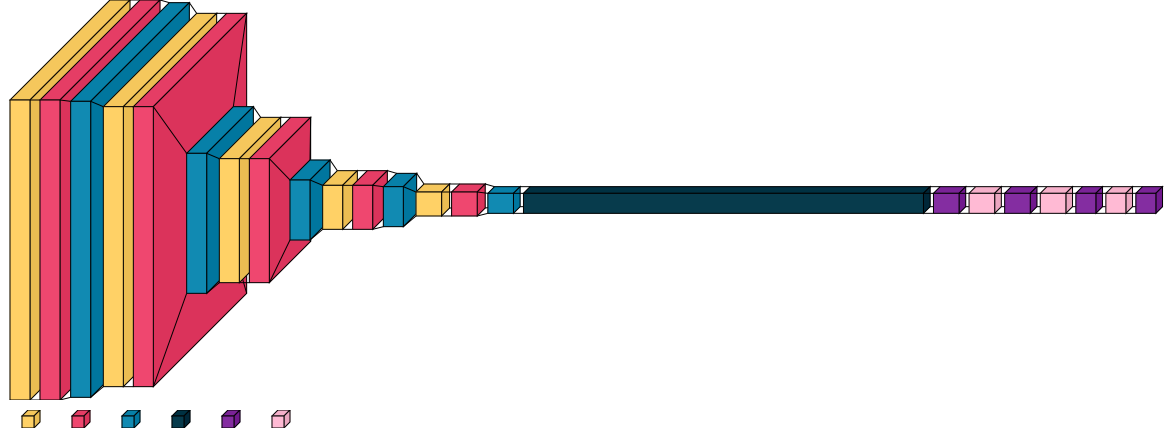

In [ ]:
layered_view(model_woBN_dilated, legend=True, max_xy=300)

In [ ]:
#train model, 15% from training data is used for validation, the training is run on 32 epochs
hist_woBN_dilated= model_woBN_dilated.fit(
    xtrain,ytrain,               
    epochs=epochs,              
    validation_split= 0.15,
    batch_size= 64, 
    callbacks= reduce_lr
    
)

Epoch 1/32


ValueError: Exception encountered when calling Sequential.call().

[1m'regular conv' is not a valid scope name. A scope name has to match the following pattern: ^[A-Za-z0-9_.\\/>-]*$[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 150, 150, 3), dtype=uint8)
  • training=True
  • mask=None

In [ ]:
#save history
history_dict = hist_woBN_dilated.history
with open('model_woBN_dilatedhistory.json', 'w') as f:
    json.dump(history_dict, f)

In [ ]:
#funktion to plot the history from trained data
def plot_history(History):
    for key in History.history:
        if not key.startswith('val_'):  
            val_key = f"val_{key}" 
            
            plt.plot(History.history[key], label=f"Training {key}")
            
            if val_key in History.history:  
                plt.plot(History.history[val_key], label=f"Validation {key}")
            
            plt.title(f"Training and Validation {key}")
            plt.xlabel('Epochs')
            plt.ylabel(key.capitalize())
            plt.legend()
            plt.show()

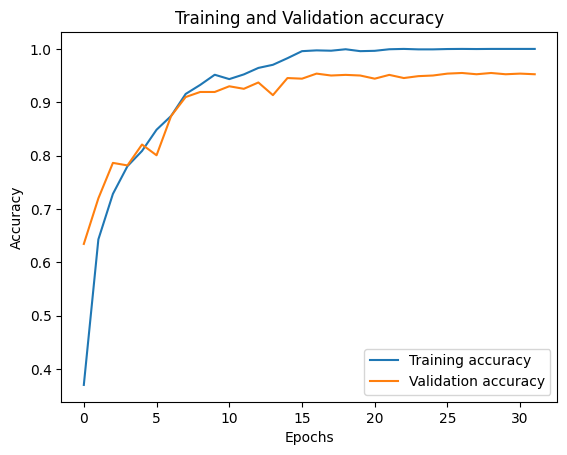

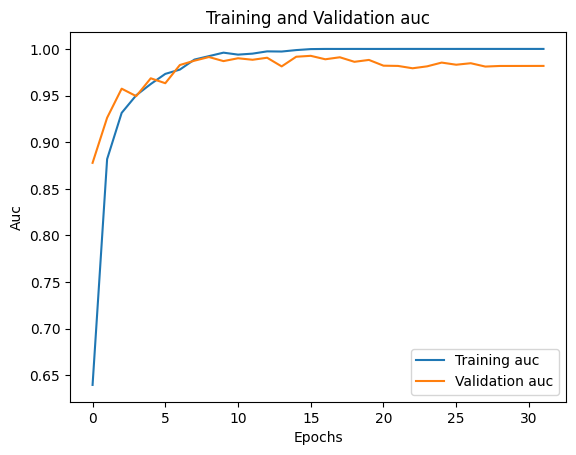

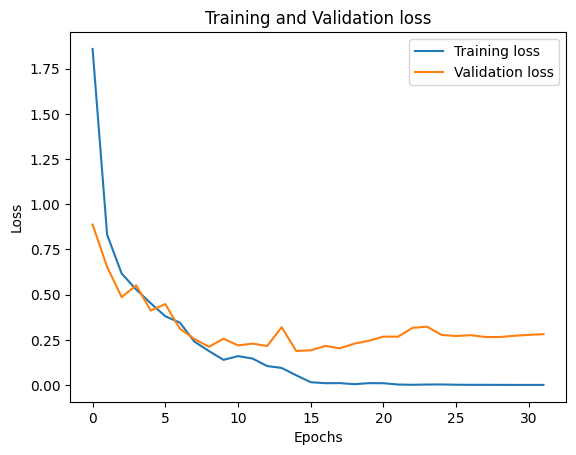

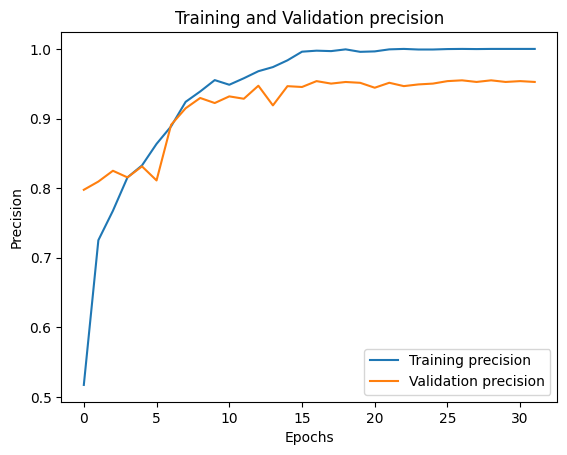

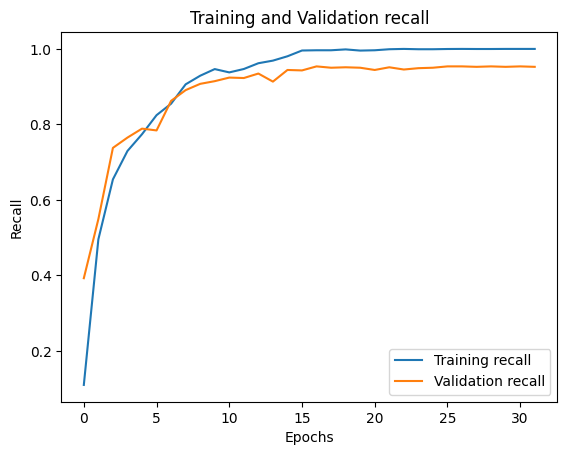

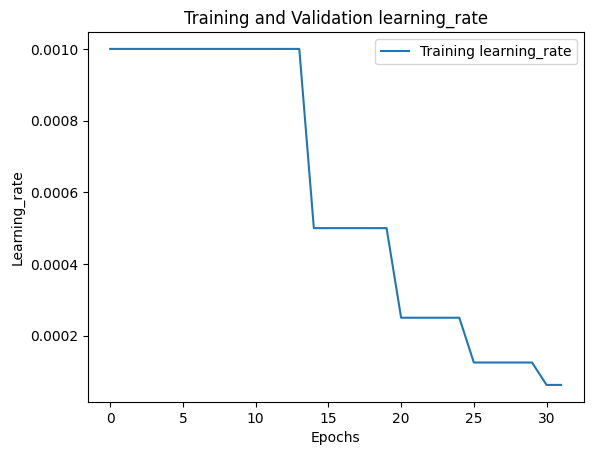

In [ ]:
plot_history(hist_woBN_dilated)

In [ ]:
# Evaluate on test data
test_loss, test_accuracy, test_precision, test_recall, test_auc = model_woBN_dilated.evaluate(xtest, ytest, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 4.7401
Test Accuracy: 0.2619


In [ ]:
#calculate probability outcomes
y_pred_prob = model_woBN_dilated.predict(xtest) 

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step


In [ ]:
#encode probability
y_pred = np.argmax(y_pred_prob, axis=1)
y_pred

array([0, 3, 0, ..., 1, 3, 2])

In [ ]:
#align ytest to y_pred format
ytest_labels = np.argmax(ytest, axis = 1)
ytest_labels

array([0, 3, 0, ..., 1, 3, 2])

Classification Report:
              precision    recall  f1-score   support

      glioma       0.96      0.93      0.94       321
     notumor       0.89      0.93      0.91       304
  meningioma       0.99      0.97      0.98       404
   pituitary       0.98      0.98      0.98       376

    accuracy                           0.96      1405
   macro avg       0.95      0.95      0.95      1405
weighted avg       0.96      0.96      0.96      1405



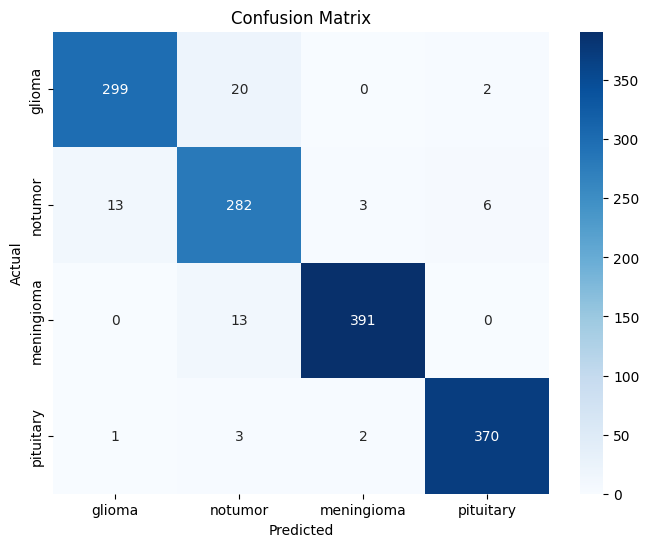

In [ ]:
# Classification report
labels = ['glioma','notumor','meningioma','pituitary']
print("Classification Report:")
print(classification_report(ytest_labels, y_pred, target_names=labels))

# Confusion matrix


conf_matrix = confusion_matrix(ytest_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Save as JSON

cm_dict = conf_matrix.tolist()  # Convert NumPy array to a list
with open('cm_model_woBN_dilated.json', 'w') as f:
    json.dump(cm_dict, f)

## Check dilated on noisy data

In [ ]:
#add Gaussian noise with a zero mean, and standard deviation of 1, meaning noise values are spread within one unit variance
def add_noise(images, noise_level= 0.1):
    noisy_images = images + noise_level * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0.0, 1.0)

x_test_noisy = add_noise(xtest)
x_train_noisy = add_noise(xtrain)

In [ ]:
#combine clean and noisy data
xtrain_combined = np.concatenate([xtrain, x_train_noisy], axis=0)
ytrain_combined = np.concatenate([ytrain, ytrain], axis=0)  # Duplicate labels
xtest_combined = np.concatenate([xtest,x_test_noisy], axis = 0)
ytest_combined = np.concatenate([ytest, ytest], axis=0)

In [ ]:
# Evaluate the model on noisy test data
noisy_evaluation = model_woBN_dilated.evaluate(x_test_noisy, ytest)
print(f"Loss: {noisy_evaluation[0]}, Accuracy: {noisy_evaluation[1]}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.4032 - auc: 0.6147 - loss: 4.5857 - precision: 0.4139 - recall: 0.3905
Loss: 4.588815689086914, Accuracy: 0.3950178027153015


In [ ]:
#train model on noisy data
noisy_hist_dilated = model_woBN_dilated.fit(
    xtrain_combined,
    ytrain_combined,
    epochs=epochs,              
    validation_split= 0.15,
    batch_size= 64, 
    callbacks= reduce_lr
    
)

Epoch 1/32
150/150 ━━━━━━━━━━━━━━━━━━━━ 145s 958ms/step - accuracy: 0.7981 - auc: 0.9449 - loss: 0.7001 - precision: 0.8613 - recall: 0.7588 - val_accuracy: 0.5943 - val_auc: 0.8252 - val_loss: 0.9764 - val_precision: 0.7448 - val_recall: 0.4881 - learning_rate: 6.2500e-05
Epoch 2/32
150/150 ━━━━━━━━━━━━━━━━━━━━ 146s 976ms/step - accuracy: 0.8443 - auc: 0.9725 - loss: 0.3895 - precision: 0.9299 - recall: 0.7848 - val_accuracy: 0.6234 - val_auc: 0.8669 - val_loss: 0.8826 - val_precision: 0.7975 - val_recall: 0.4976 - learning_rate: 6.2500e-05
Epoch 3/32
150/150 ━━━━━━━━━━━━━━━━━━━━ 136s 906ms/step - accuracy: 0.8566 - auc: 0.9788 - loss: 0.3502 - precision: 0.9336 - recall: 0.8042 - val_accuracy: 0.6821 - val_auc: 0.8940 - val_loss: 0.8038 - val_precision: 0.7861 - val_recall: 0.5492 - learning_rate: 6.2500e-05
Epoch 4/32
150/150 ━━━━━━━━━━━━━━━━━━━━ 142s 945ms/step - accuracy: 0.8837 - auc: 0.9837 - loss: 0.3109 - precision: 0.9283 - recall: 0.8297 - val_accuracy: 0.7295 - val_auc: 0.9

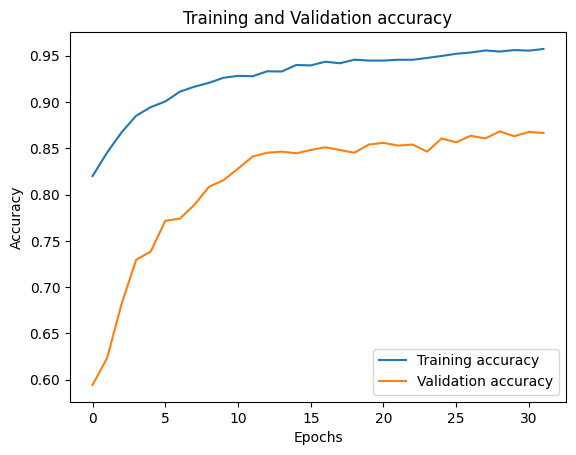

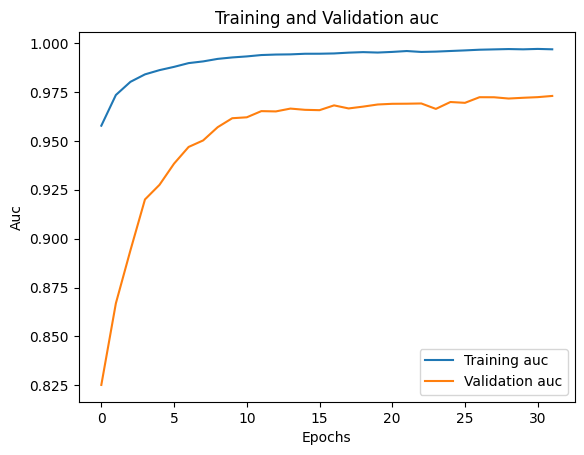

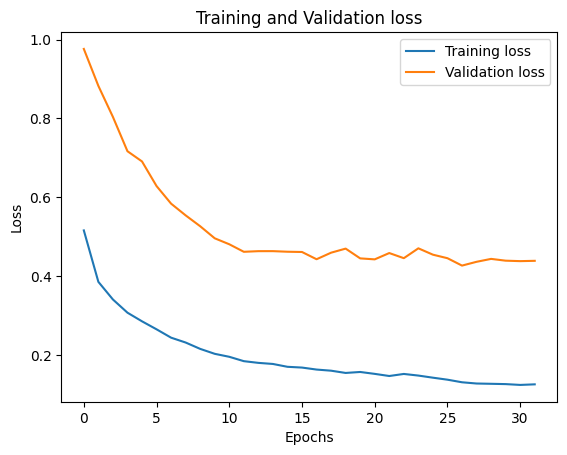

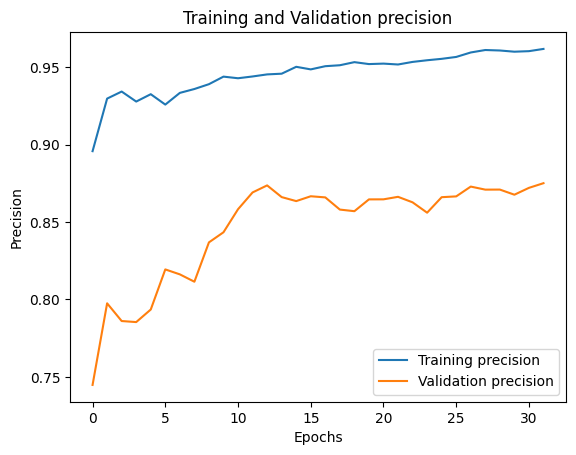

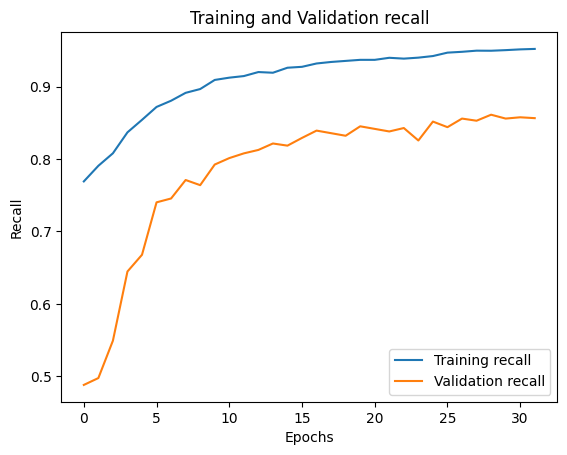

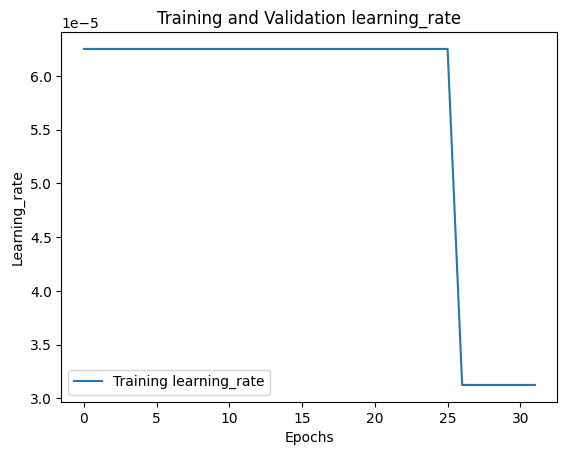

In [ ]:
plot_history(noisy_hist_dilated)

In [ ]:
#calculate probability outcomes
y_pred_prob_noisy = model_woBN_dilated.predict(x_test_noisy) 

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step


In [ ]:
y_pred_noisy = np.argmax(y_pred_prob_noisy, axis=1)
ytest_labels_noisy = np.argmax(ytest, axis = 1)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.93      0.83      0.88       321
     notumor       0.77      0.66      0.71       304
  meningioma       0.91      0.99      0.95       404
   pituitary       0.85      0.94      0.89       376

    accuracy                           0.87      1405
   macro avg       0.86      0.86      0.86      1405
weighted avg       0.87      0.87      0.87      1405



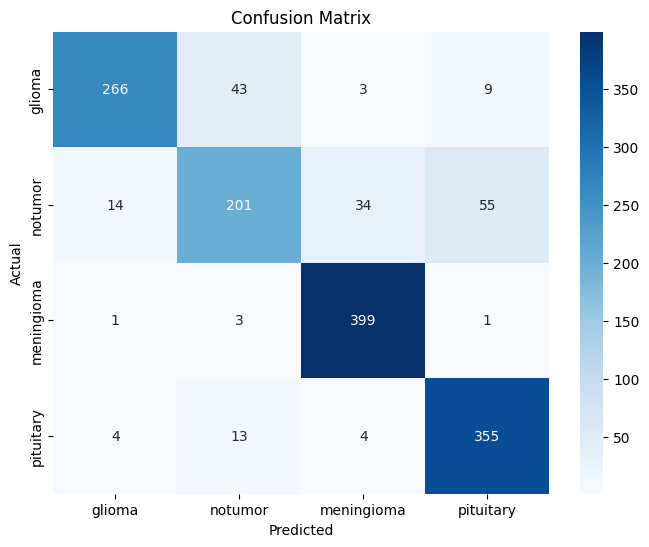

In [ ]:
# Classification report
labels = ['glioma','notumor','meningioma','pituitary']
print("Classification Report:")
print(classification_report(ytest_labels_noisy, y_pred_noisy, target_names=labels))

# Confusion matrix
import seaborn as sns

conf_matrix = confusion_matrix(ytest_labels_noisy, y_pred_noisy)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Evaluate on test data
test__noise_loss, test_noise_accuracy, test_noise_precision, test_noise_recall, test_noise_auc = model_woBN_dilated.evaluate(xtest_combined, ytest_combined, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.3531
Test Accuracy: 0.9637
